In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.data import page
from skimage.filters import threshold_sauvola

import io

from IPython.display import clear_output, Image, display
import PIL.Image
from keras.models import load_model
import math
import tensorflow as tf
from skimage.color import rgb2gray

Using TensorFlow backend.


In [2]:
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [3]:
model = load_model('../weights.best.hdf5')
# new_model = tf.keras.experimental.load_from_saved_model(saved_model_path)
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 19712)             0         
_______________________________________

In [4]:
img = cv2.imread('input_files/slice5.png')  #Afbeelding waar je alles op uitvoert

# convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# smooth the image to avoid noises
gray = cv2.medianBlur(gray,5)

# Apply adaptive threshold
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)
thresh_color = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

# apply some dilation and erosion to join the gaps
thresh = cv2.dilate(thresh,None,iterations = 3)
thresh = cv2.erode(thresh,None,iterations = 2)

# Find the contours
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

thresh = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# For each contour, find the bounding rectangle and draw it

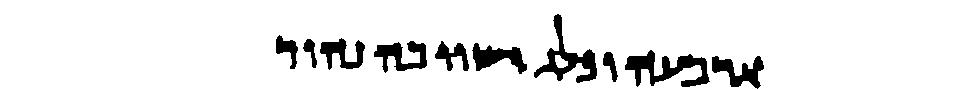

In [5]:
# ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# thresh1.shape
showarray(img)

In [6]:
words = [];
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if w > 50:
        words.append(img[y:y+h, x:x+w]);
    cv2.rectangle(thresh,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.rectangle(thresh_color,(x,y),(x+w,y+h),(0,255,0),2)


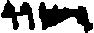

In [7]:
word = words[1]
showarray(word)

In [8]:
# def get_resized_img(img, video_size):
#     width, height = video_size  # these are the MAX dimensions
#     video_ratio = width / height
#     img_ratio = img.size[0] / img.size[1]
#     if video_ratio >= 1:  # the video is wide
#         if img_ratio <= video_ratio:  # image is not wide enough
#             width_new = int(height * img_ratio)
#             size_new = width_new, height
#         else:  # image is wider than video
#             height_new = int(width / img_ratio)
#             size_new = width, height_new
#     else:  # the video is tall
#         if img_ratio >= video_ratio:  # image is not tall enough
#             height_new = int(width / img_ratio)
#             size_new = width, height_new
#         else:  # image is taller than video
#             width_new = int(height * img_ratio)
#             size_new = width_new, height
#     return np.asarray(img.resize(size_new, resample=Image.LANCZOS))

In [9]:
h, w, _ = word.shape
num = 4
chars = []
for i in range(num):
    part = math.floor(w / num)
    char = word[:,part * i:(part * i) + part]
    shape = cv2.resize(char,(32,48))
    ret,thresh1 = cv2.threshold(shape,127,255,cv2.THRESH_BINARY)
    chars.append(thresh1)

In [10]:
char = chars[0]

In [11]:
char = cv2.cvtColor(char, cv2.COLOR_BGR2GRAY)
char = char.reshape((-1, 48, 32,1))

In [12]:
with tf.device('/cpu:0'):
      model.predict([char])
# model.predict([char]).shape